In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 
import matplotlib.gridspec as gridspec
from scipy.signal import butter, lfilter
from sklearn import decomposition

import mne

import os

import glob

from utils import *

from time import sleep

In [4]:
foldername = '../../../Originals/procesados/'

In [5]:
filenames = sorted(os.listdir(foldername))

In [6]:
eeg_data, s_rate, n_channels, n_samples = get_egg_data(foldername + filenames[0])

In [7]:
print("Sampling rate: {:.2f} Hz".format(s_rate))
print("Data shape: {:d} samples x {:d} channels".format(n_samples, n_channels))
print("Tiempo total : {:.2f} ".format(n_samples/s_rate))

Sampling rate: 256.00 Hz
Data shape: 7681 samples x 30 channels
Tiempo total : 30.00 


In [8]:
mont1020 = Mont1020()

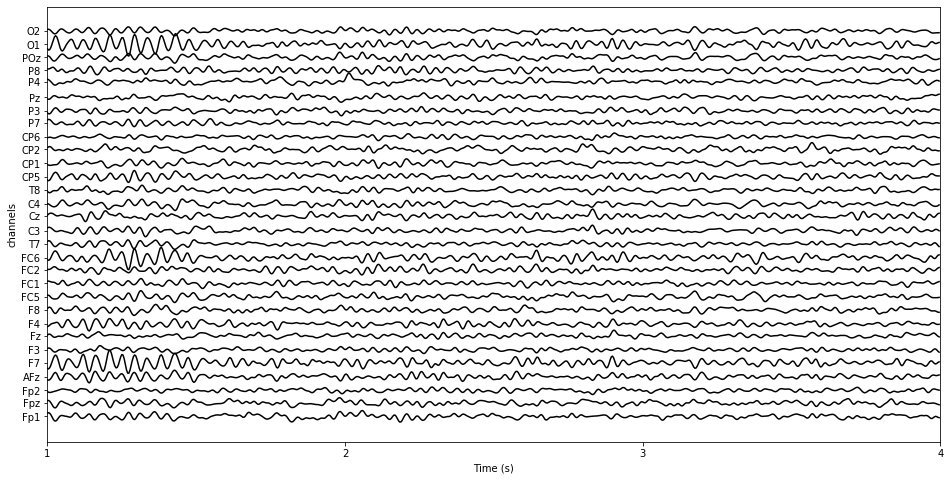

In [9]:
plot_eeg_data(eeg_data=eeg_data,
              ch_names=mont1020.get_ch_names())

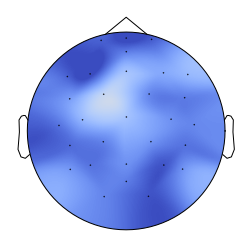

In [10]:
plot_topology(eeg_data=eeg_data, 
              info_eeg=mont1020.get_info_eeg())

In [11]:
eeg_data_pca, variance_ratio = get_pca_eeg_data(eeg_data)

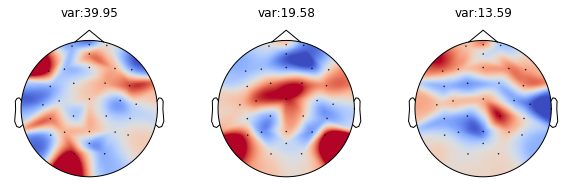

In [13]:
plot_pca_eeg_data(eeg_data_pca, variance_ratio, mont1020.get_info_eeg())

# Abrir los archivos .TXT. Visualizar las series temporales para cada canal.

# Graficar los promedios de la topografía para cada participante. ¿Hay diferencias entre los dos períodos de reposo?

# Calcular las componentes principales para el total de los datos (concatenados en el tiempo). ¿Qué peso tiene cada proyección en los distintos períodos de reposo?

Analizando el archivo suj_10_bl_1.txt


Gráfica serie de tiempo




Gráfica topología EEG Data filtrada 



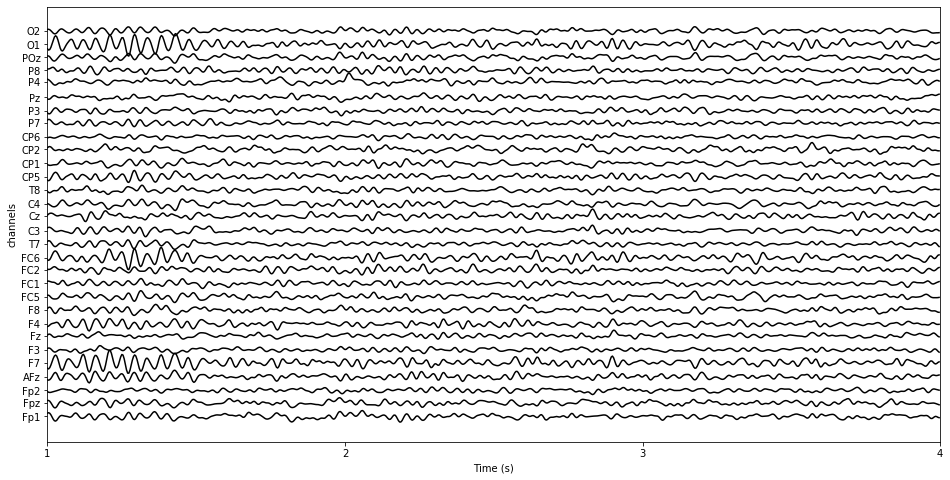

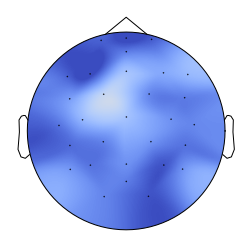




Gráfica tEEG Data filtrada PCA



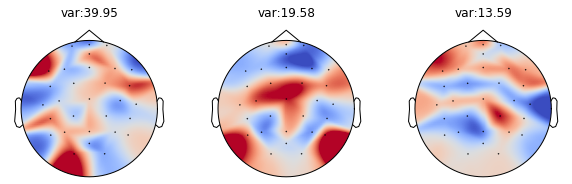




Analizando el archivo suj_10_bl_2.txt


Gráfica serie de tiempo




Gráfica topología EEG Data filtrada 



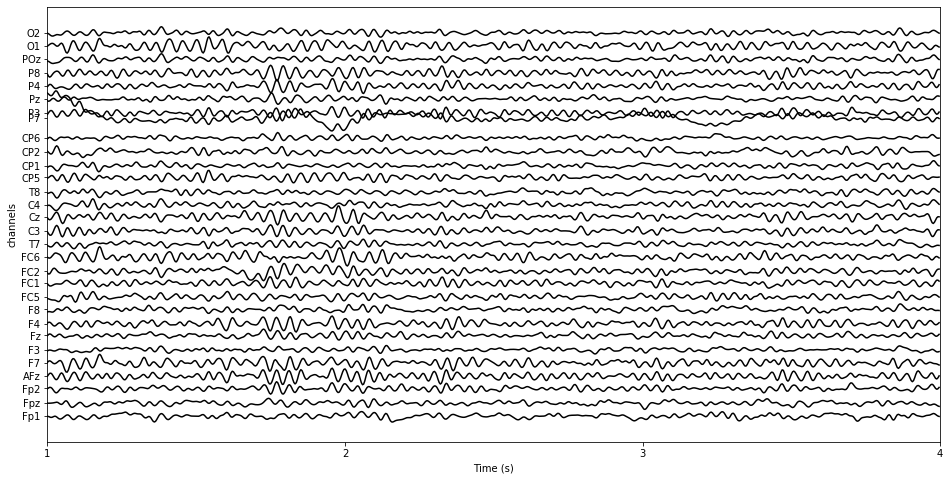

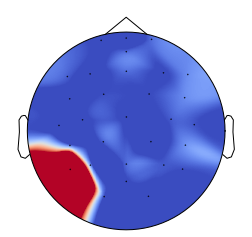




Gráfica tEEG Data filtrada PCA



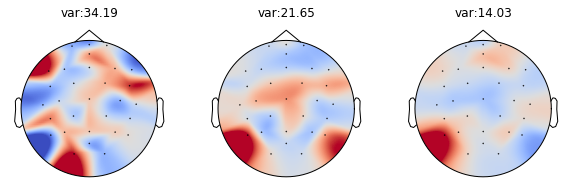




Analizando el archivo suj_12_bl_1.txt


Gráfica serie de tiempo




Gráfica topología EEG Data filtrada 



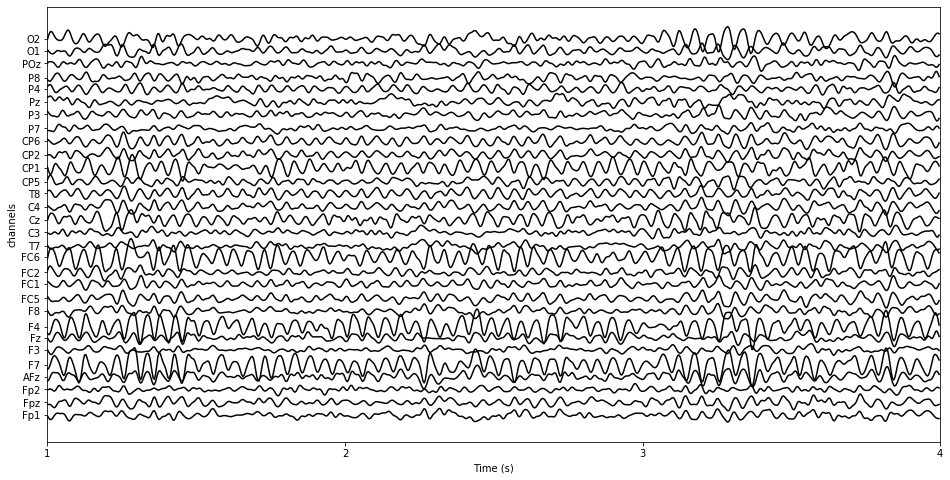

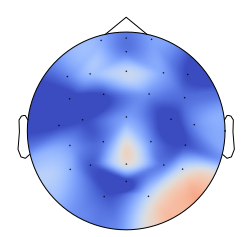




Gráfica tEEG Data filtrada PCA



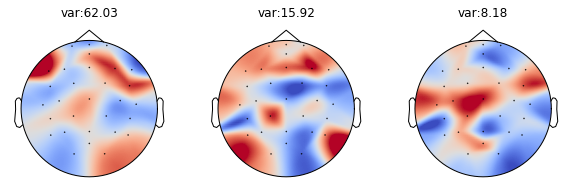




Analizando el archivo suj_12_bl_2.txt


Gráfica serie de tiempo




Gráfica topología EEG Data filtrada 



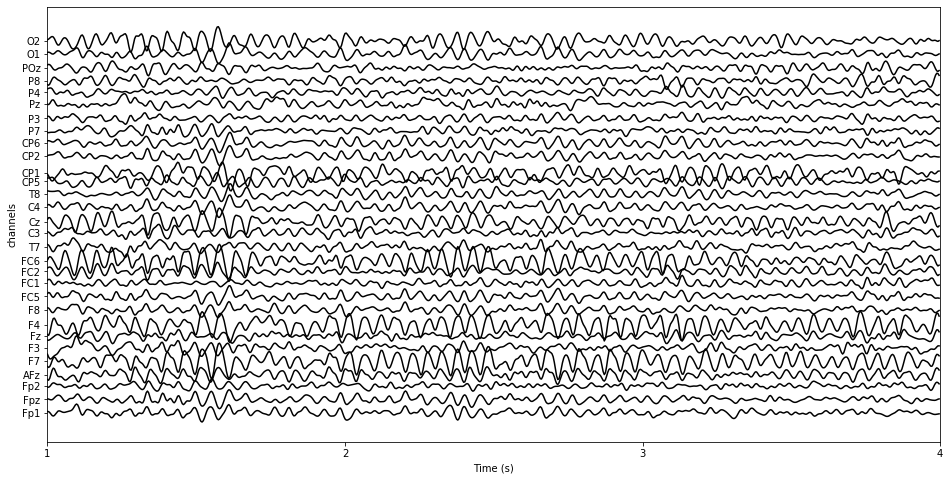

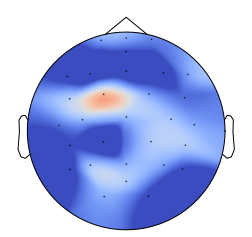




Gráfica tEEG Data filtrada PCA



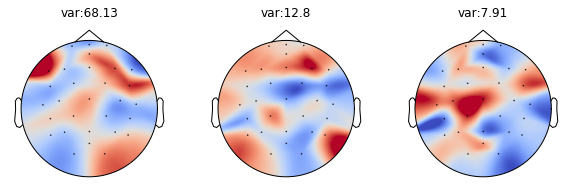




Analizando el archivo suj_13_bl_1.txt


Gráfica serie de tiempo




Gráfica topología EEG Data filtrada 



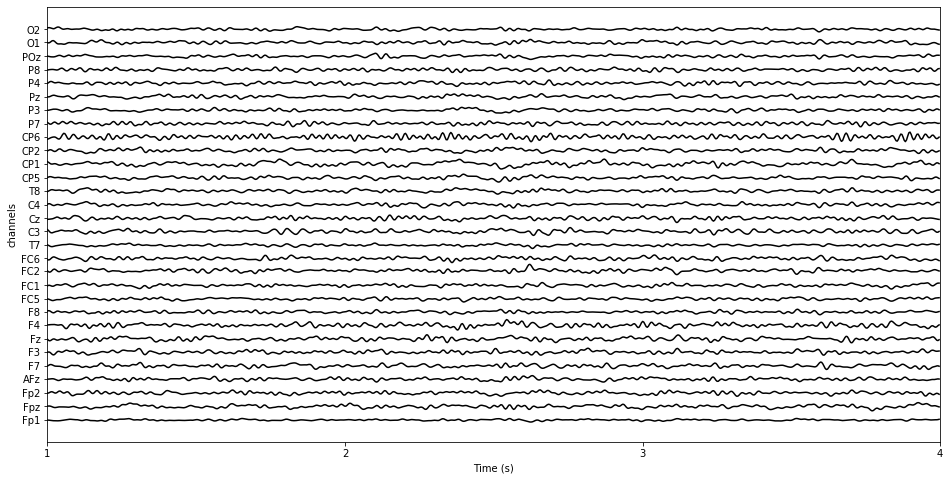

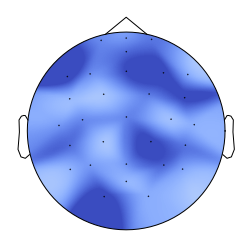




Gráfica tEEG Data filtrada PCA



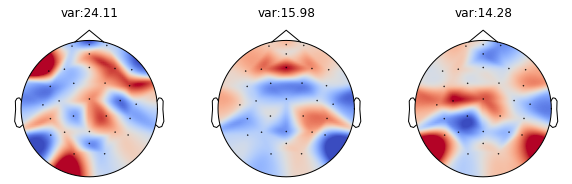




Analizando el archivo suj_13_bl_2.txt


Gráfica serie de tiempo




Gráfica topología EEG Data filtrada 



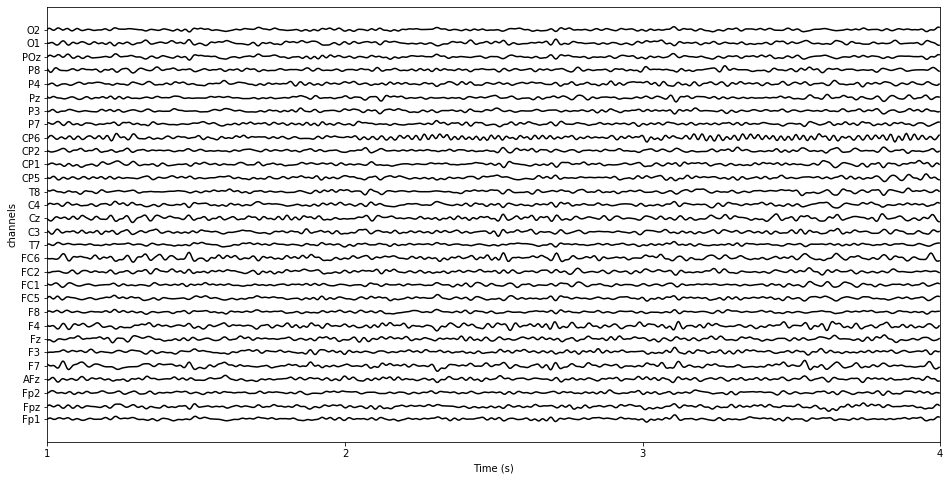

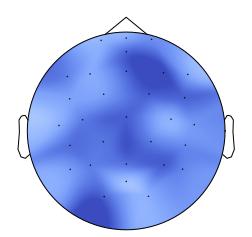




Gráfica tEEG Data filtrada PCA



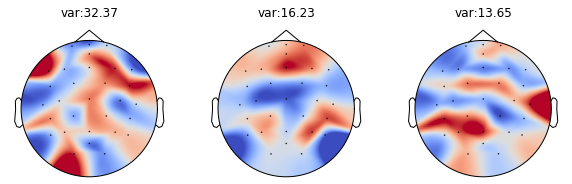




Analizando el archivo suj_8_bl_1.txt


Gráfica serie de tiempo




Gráfica topología EEG Data filtrada 



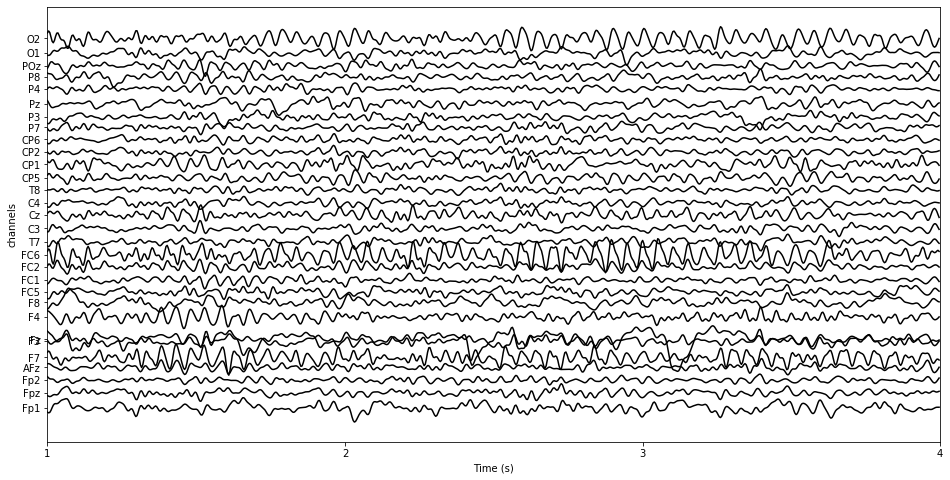

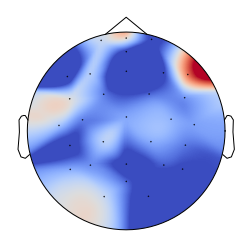




Gráfica tEEG Data filtrada PCA



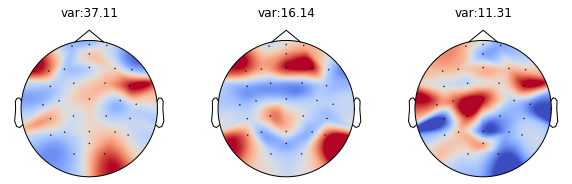




Analizando el archivo suj_8_bl_2.txt


Gráfica serie de tiempo




Gráfica topología EEG Data filtrada 



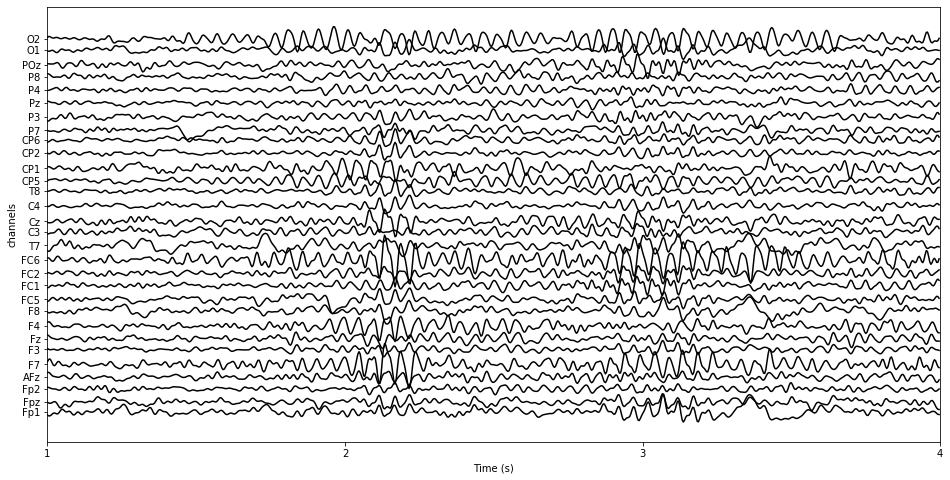

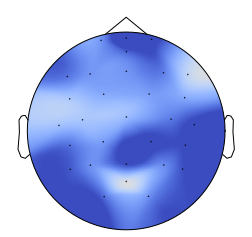




Gráfica tEEG Data filtrada PCA



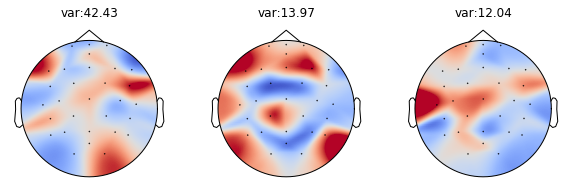




Analizando el archivo suj_9_bl_1.txt


Gráfica serie de tiempo




Gráfica topología EEG Data filtrada 



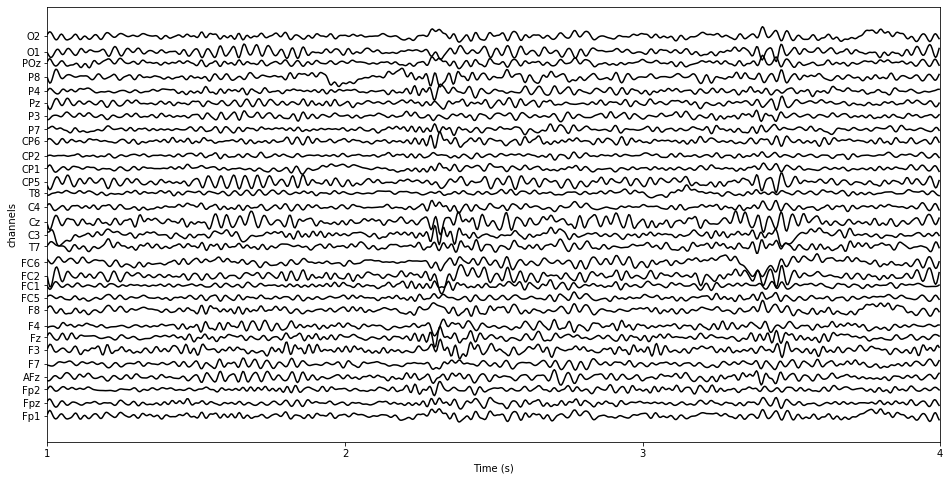

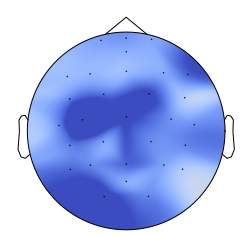




Gráfica tEEG Data filtrada PCA



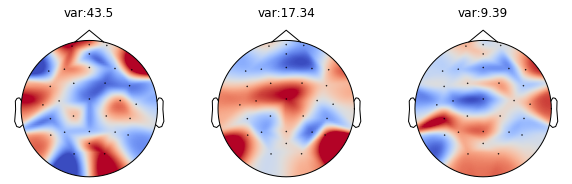




Analizando el archivo suj_9_bl_2.txt


Gráfica serie de tiempo




Gráfica topología EEG Data filtrada 



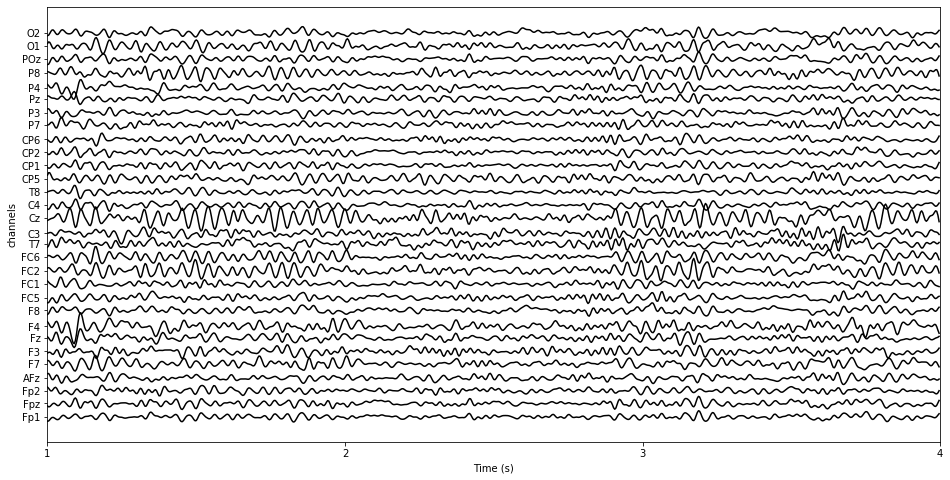

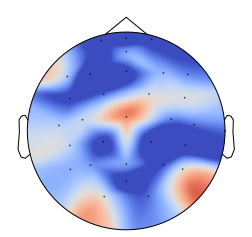




Gráfica tEEG Data filtrada PCA



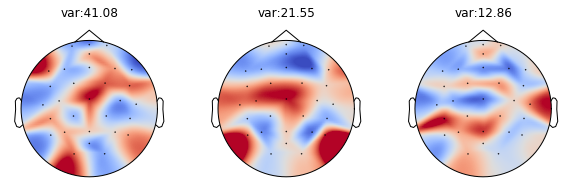

In [14]:
for file in filenames:
    print(f'Analizando el archivo {file}\n\n')
    
    eeg_data, s_rate, n_channels, n_samples = get_egg_data(foldername + file)

    print('Gráfica serie de tiempo\n')
    plot_eeg_data(eeg_data,
                  ch_names=mont1020.get_ch_names())
    print('\n\n')    
    print('Gráfica topología EEG Data filtrada \n')
    plot_topology(eeg_data=eeg_data,
                  info_eeg=mont1020.get_info_eeg())
    
    print('\n\n')
    print('Gráfica tEEG Data filtrada PCA\n')
    eeg_data_pca, variance_ratio = get_pca_eeg_data(eeg_data)
    plot_pca_eeg_data(eeg_data_pca, variance_ratio, mont1020.get_info_eeg())
    print('\n\n')    
    sleep(1)    

## Sujeto 9: No se nota tanta diferencia entre los 2 estados de reposo.
## Sujeto 8: Se nota diferencias entre los 2 estados de reposo.
## Sujeto 13: No se nota tanta diferencia entre los 2 estados de reposo.
## Sujeto 10: Se nota diferencias entre los 2 estados de reposo.
## Sujeto : Se nota diferencias entre los 2 estados de reposo.

## Plot de pre y post aprendisaje

In [ ]:
for i in range(0,len(filenames),2):
  
    print(f'Analizando el archivo {filenames[i]}\n\n')
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

    eeg_data, s_rate, n_channels, n_samples = get_egg_data(foldername + filenames[i])    
    print('Gráfica serie de tiempo\n')
    plot_eeg_data(axes[0], eeg_data, ch_names=mont1020.get_ch_names())

    eeg_data_1, s_rate_1, n_channels_1, n_samples_1 = get_egg_data(foldername + filenames[i+1])
    plot_eeg_data(axes[1], eeg_data_1, ch_names=mont1020.get_ch_names())

    print('\n\n')    
    print('Gráfica topología EEG Data filtrada {} \n'.format(filenames[i]))
    plot_topology(eeg_data=eeg_data, info_eeg=mont1020.get_info_eeg())
    print('Gráfica topología EEG Data filtrada {} \n'.format(filenames[i+1]))
    plot_topology(eeg_data=eeg_data_1, info_eeg=mont1020.get_info_eeg())

    print('\n\n')
    print('Gráfica topología EEG Data filtrada PCA {}\n'.format(filenames[i]))
    eeg_data_pca, variance_ratio = get_pca_eeg_data(eeg_data)
    plot_pca_eeg_data(eeg_data_pca, variance_ratio, mont1020.get_info_eeg())
    print('Gráfica topología EEG Data filtrada PCA {}\n'.format(filenames[i+1]))
    eeg_data_pca_1, variance_ratio = get_pca_eeg_data(eeg_data_1)
    plot_pca_eeg_data(eeg_data_pca_1, variance_ratio, mont1020.get_info_eeg())
    print('\n\n')    
    sleep(1)    

# Respuesta PCA???

In [ ]:
eeg_data_list_bl1 = []
eeg_data_list_bl2 = []

for i in range(0,len(filenames),2):
    eeg_data, s_rate, n_channels, n_samples = get_egg_data(foldername + filenames[i])
    eeg_data_1, s_rate_1, n_channels_1, n_samples_1 = get_egg_data(foldername + filenames[i+1])
    eeg_data_list_bl1 += [eeg_data]
    eeg_data_list_bl2 += [eeg_data_1]

eeg_data_pre = np.concatenate(eeg_data_list_bl1,axis=1)
eeg_data_pos = np.concatenate(eeg_data_list_bl2,axis=1)

print('\n\n')
print('Gráfica topología EEG Data filtrada PCA pre\n')
eeg_data_pca, variance_ratio = get_pca_eeg_data(eeg_data_pre)
plot_pca_eeg_data(eeg_data_pca, variance_ratio, mont1020.get_info_eeg())
print('Gráfica topología EEG Data filtrada PCA pos\n')
eeg_data_pca_1, variance_ratio = get_pca_eeg_data(eeg_data_pos)
plot_pca_eeg_data(eeg_data_pca_1, variance_ratio, mont1020.get_info_eeg())
print('\n\n')  

# Referenciar los datos al promedio por sample. Que quiere decir esto???

# Calcular el Campo de Potencia Global (GFP, [1])

Analizando el archivo suj_10_bl_1.txt


Gráfica GFP de suj_10_bl_1.txt 



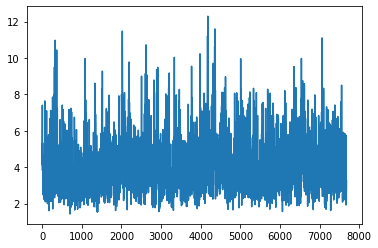

Analizando el archivo suj_10_bl_2.txt


Gráfica GFP de suj_10_bl_2.txt 



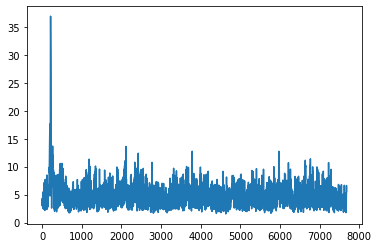

Analizando el archivo suj_12_bl_1.txt


Gráfica GFP de suj_12_bl_1.txt 



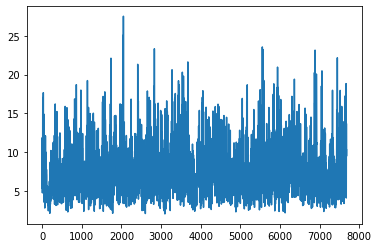

Analizando el archivo suj_12_bl_2.txt


Gráfica GFP de suj_12_bl_2.txt 



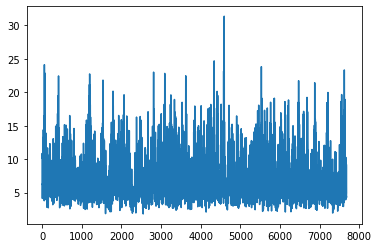

Analizando el archivo suj_13_bl_1.txt


Gráfica GFP de suj_13_bl_1.txt 



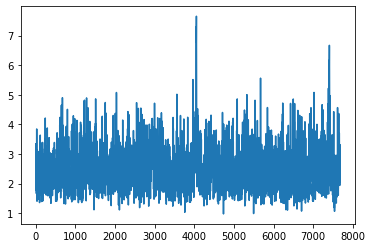

Analizando el archivo suj_13_bl_2.txt


Gráfica GFP de suj_13_bl_2.txt 



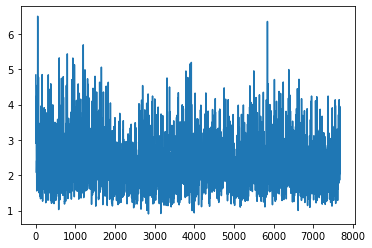

Analizando el archivo suj_8_bl_1.txt


Gráfica GFP de suj_8_bl_1.txt 



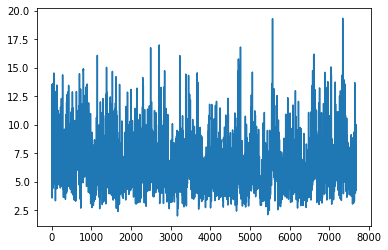

Analizando el archivo suj_8_bl_2.txt


Gráfica GFP de suj_8_bl_2.txt 



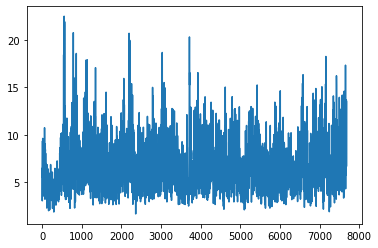

Analizando el archivo suj_9_bl_1.txt


Gráfica GFP de suj_9_bl_1.txt 



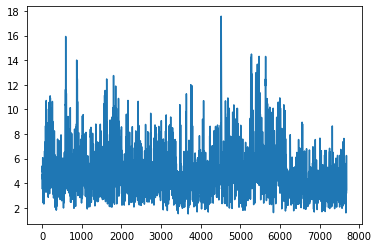

Analizando el archivo suj_9_bl_2.txt


Gráfica GFP de suj_9_bl_2.txt 



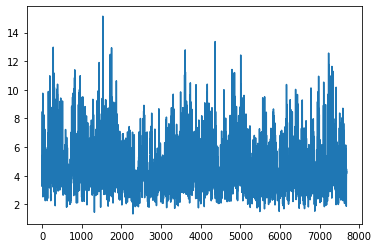

In [20]:
for file in filenames:
    print(f'Analizando el archivo {file}\n\n')
    
    eeg_data, s_rate, n_channels, n_samples = get_egg_data(foldername + file)

    print(f'Gráfica GFP de {file} \n')
    df = pd.DataFrame(eeg_data)
    plt.figure()
    df.std().plot()
    plt.show()
  

In [16]:
df.shape

(30, 7681)

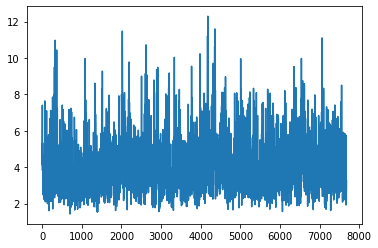

In [15]:
df.std().plot()